# Analysing NSW Property Data



In [26]:
import pandas as pd
import os
import matplotlib.pyplot as plt


#### Combine the data

In [ ]:
files = [file for file in os.listdir("./LGA_data") if file.endswith(".xls")]
all_files = pd.DataFrame()

for file in files:
    df = pd.read_excel("./LGA_data/" + file)
    all_files = pd.concat([all_files, df])

#### Clean the data

In [ ]:
all_files.dropna(subset=['Street Display'], inplace=True)

In [21]:
df = all_files
df.to_csv('alldata.csv', index=False)

#### Analyse the data

In [25]:
# Check if all LGAs have sale data from 1/7/2018 to 1/7/2023
# oldest_sale_dates = df.groupby('LGA')['Sale Date'].min()
# print(oldest_sale_dates)
# oldest_sale_dates.to_csv('oldest_sale_dates.csv')

LGA
ALBURY CITY COUNCIL           2018-07-02
ARMIDALE REGIONAL COUNCIL     2018-07-02
BALLINA SHIRE COUNCIL         2018-07-02
BALRANALD SHIRE COUNCIL       2018-07-03
BATHURST REGIONAL COUNCIL     2018-07-02
                                 ...    
WINGECARRIBEE SHIRE COUNCIL   2018-07-02
WOLLONDILLY SHIRE COUNCIL     2018-07-01
WOLLONGONG CITY COUNCIL       2018-07-01
WOOLLAHRA MUNICIPAL COUNCIL   2018-07-01
YASS VALLEY COUNCIL           2018-07-02
Name: Sale Date, Length: 130, dtype: datetime64[ns]


When downloading the data, I noticed that there would be a maximum of 10,000 observations downloaded for each LGA. I want to investigate whether there is a gap of sales data in those LGAs from 01/07/2018 to 01/07/2023. I will need to download more data for these LGAs. Below I find at what date I should re-download data.

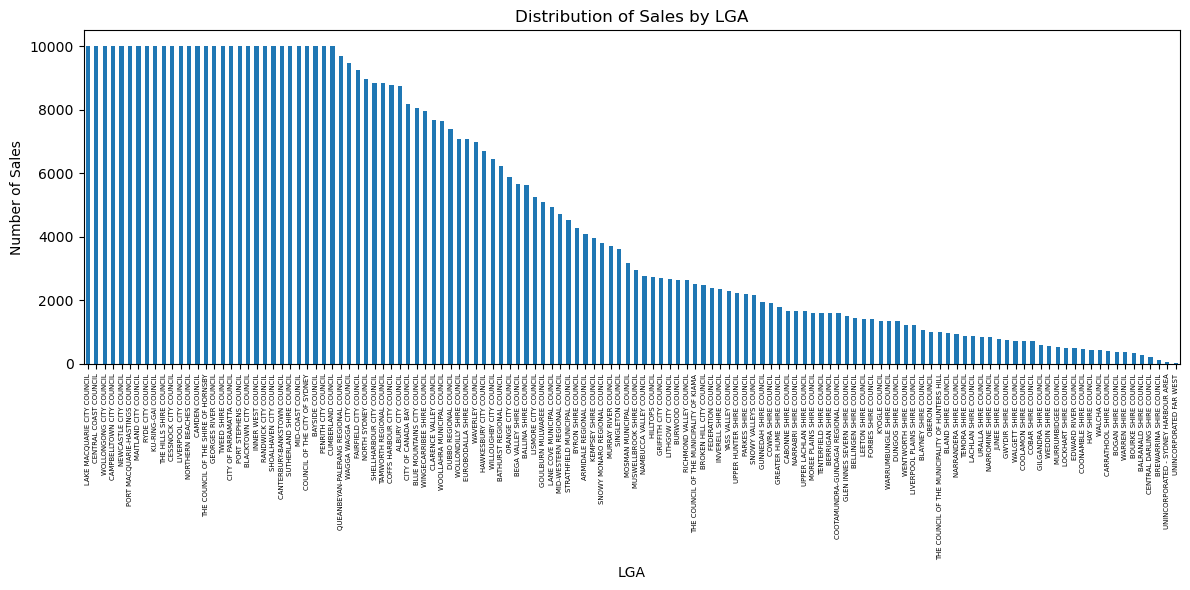

LGAs with 10,000 sales, latest sale dates, and Street Display:
LGA: LAKE MACQUARIE CITY COUNCIL, Latest Sale Date: 2020-10-21 00:00:00, Street Display: 127 CARROLL CCT
LGA: CENTRAL COAST COUNCIL, Latest Sale Date: 2019-12-10 00:00:00, Street Display: 35 LORD ST
LGA: WOLLONGONG CITY COUNCIL, Latest Sale Date: 2021-02-09 00:00:00, Street Display: 9 JASMINE ST
LGA: CAMPBELLTOWN CITY COUNCIL, Latest Sale Date: 2021-07-22 00:00:00, Street Display: 21B STATION RD
LGA: NEWCASTLE CITY COUNCIL, Latest Sale Date: 2021-02-12 00:00:00, Street Display: 2 NORTH ST
LGA: PORT MACQUARIE-HASTINGS COUNCIL, Latest Sale Date: 2022-04-12 00:00:00, Street Display: 358 COMMANDER ST
LGA: MAITLAND CITY COUNCIL, Latest Sale Date: 2022-01-18 00:00:00, Street Display: 5 COCKATOO RDGE
LGA: RYDE CITY COUNCIL, Latest Sale Date: 2022-03-04 00:00:00, Street Display: 2A FAY PL
LGA: KU-RING-GAI COUNCIL, Latest Sale Date: 2022-08-25 00:00:00, Street Display: 9 ZELDA AVE
LGA: THE HILLS SHIRE COUNCIL, Latest Sale Date: 2020

In [38]:
# Group the data by LGA and count the number of sales
sales_count_by_lga = df['LGA'].value_counts()

# Plot the distribution graph
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed
sales_count_by_lga.plot(kind='bar')
plt.xlabel('LGA')
plt.ylabel('Number of Sales')
plt.title('Distribution of Sales by LGA')
plt.xticks(rotation=90, fontsize=5)  # Rotate x-axis labels if needed
plt.tight_layout()  # Adjust the layout
plt.show()

# Filter LGAs with 10,000 sales
lgas_with_10000_sales = sales_count_by_lga[sales_count_by_lga == 10000]

# Print the names of LGAs with 10,000 sales
print("LGAs with 10,000 sales, latest sale dates, and Street Display:")
for lga in lgas_with_10000_sales.index:
    lga_data = df[df['LGA'] == lga]
    latest_sale_date = lga_data['Sale Date'].max()
    latest_sale_street_display = lga_data.loc[lga_data['Sale Date'] == latest_sale_date, 'Street Display'].iloc[0]
    print(f"LGA: {lga}, Latest Sale Date: {latest_sale_date}, Street Display: {latest_sale_street_display}")